# The data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

plt.style.use('ggplot')

data = pd.read_json('./data.json')

In [2]:
data.columns

Index(['x1', 'x2', 'x3', 'x4', 'y'], dtype='object')

In [3]:
data.describe()

,x1,x2,x3,x4,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.494000,11.581000,126.729000,12.148000,-24.399000
std,0.500214,6.353409,62.644185,6.697533,172.366517
min,2.000000,1.000000,17.000000,1.000000,-1092.000000
25%,2.000000,6.000000,72.000000,7.000000,5.000000
50%,2.000000,11.000000,129.500000,12.000000,9.000000
75%,3.000000,17.000000,182.000000,18.000000,17.000000
max,3.000000,23.000000,230.000000,23.000000,167.000000


In [4]:
data.head()

,x1,x2,x3,x4,y
0,3,9,141,14,13
1,2,18,91,16,5
2,3,15,197,15,12
3,2,17,132,18,6
4,3,17,151,11,20


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      1000 non-null   int64
 1   x2      1000 non-null   int64
 2   x3      1000 non-null   int64
 3   x4      1000 non-null   int64
 4   y       1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


In [6]:
data['y'][:10]

0    13
1     5
2    12
3     6
4    20
5     5
6    49
7    21
8     4
9   -63
Name: y, dtype: int64

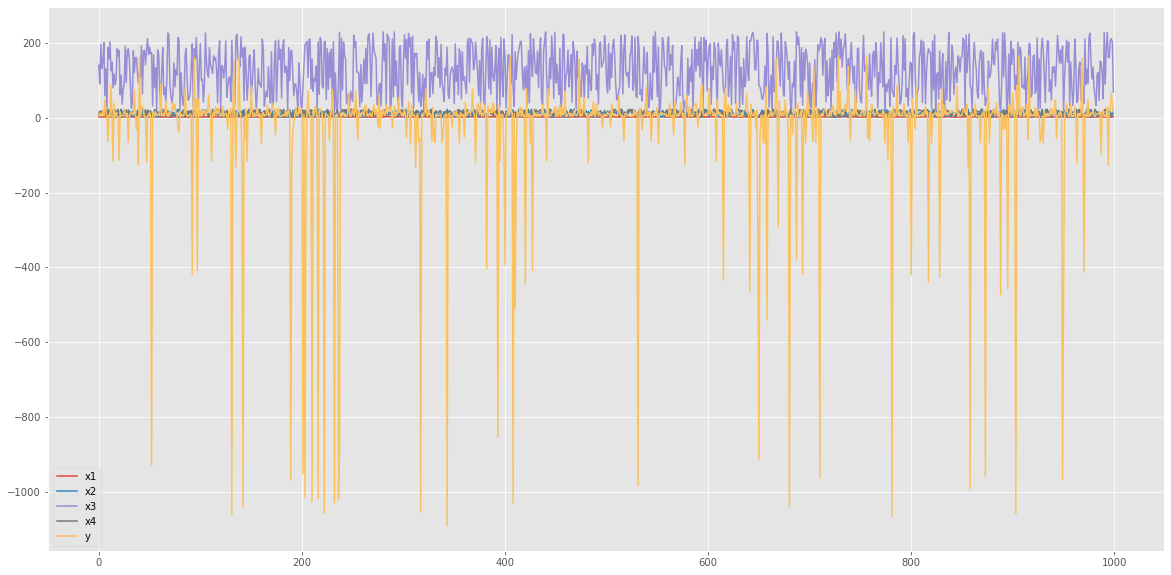

In [7]:
data.plot(figsize=(20, 10))

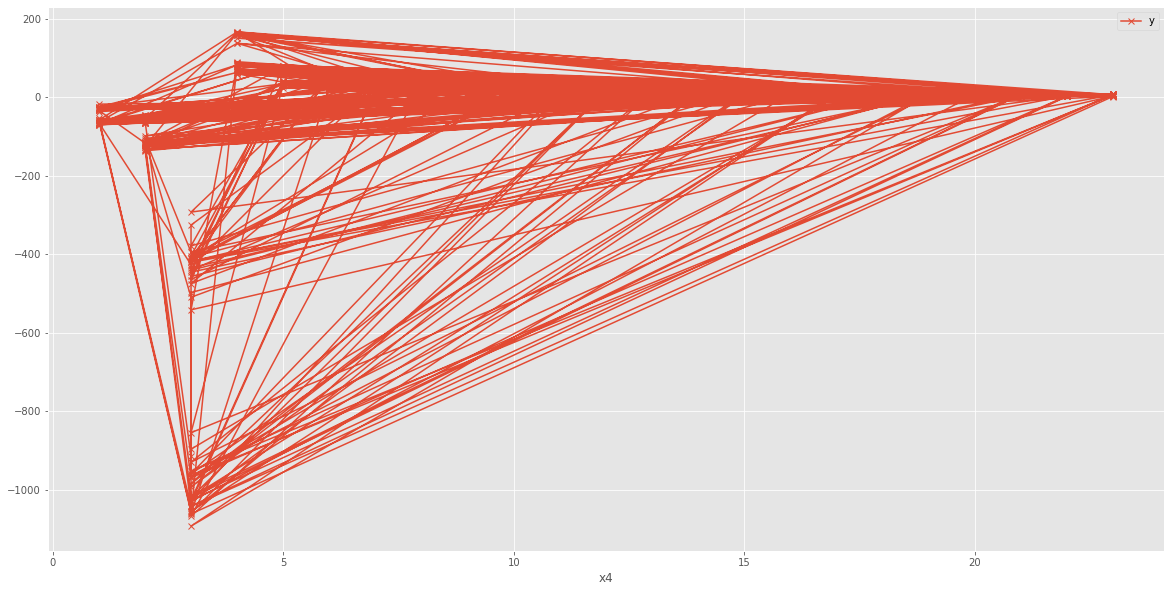

In [8]:
data.plot(x='x4', y='y', figsize=(20, 10), marker="x")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a7db7c1c0>,
      dtype=object)

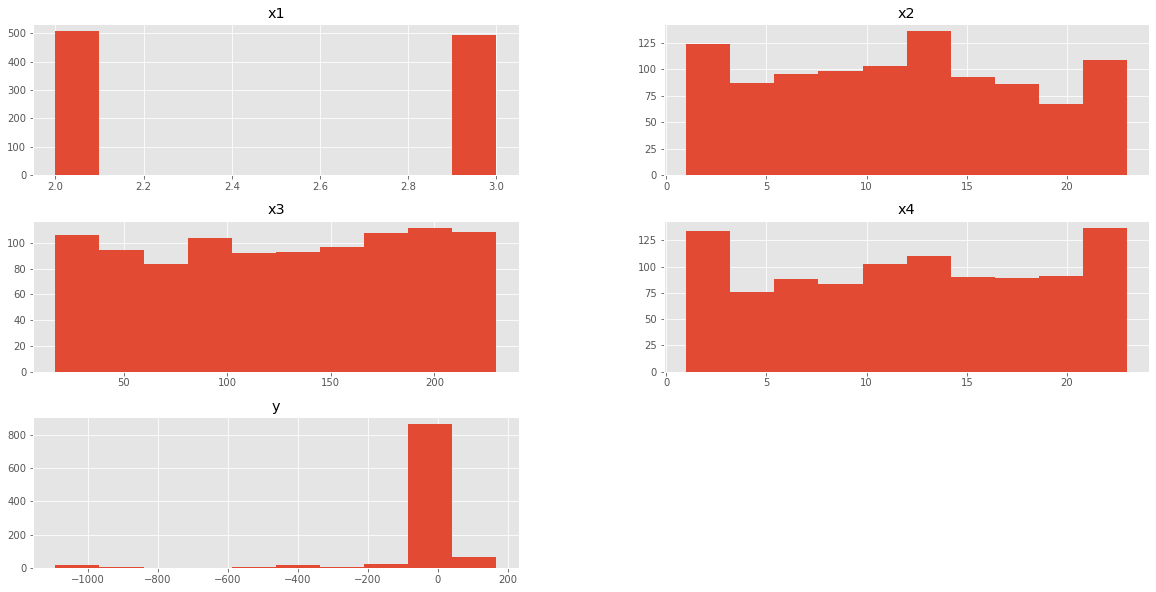

In [9]:
data.hist(figsize=(20, 10))

In [10]:
display(data[data.y < -1000])

,x1,x2,x3,x4,y
131,3,15,208,3,-1061
142,3,21,187,3,-1041
203,3,6,195,3,-1015
210,3,10,158,3,-1026
216,3,22,203,3,-1019
222,3,17,202,3,-1057
232,3,10,18,3,-1029
236,3,7,101,3,-1020
317,3,12,31,3,-1054
343,3,23,189,3,-1092


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a7d777910>,
      dtype=object)

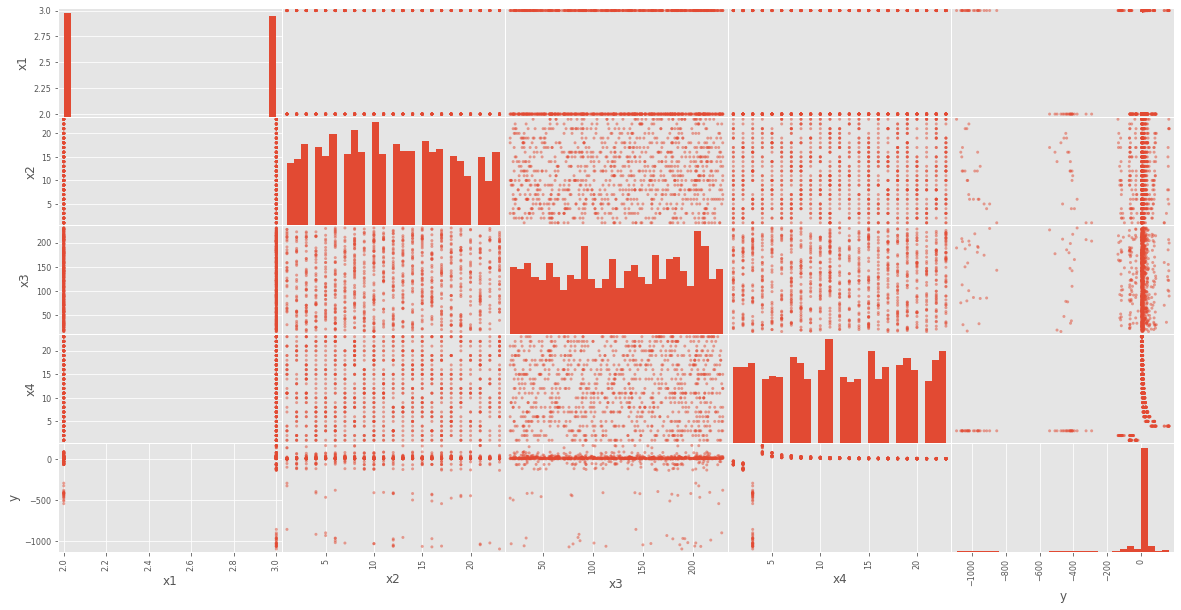

In [11]:
newData = data[data.y < -1000]
pd.plotting.scatter_matrix(data, figsize=(20, 10), hist_kwds={'bins':30})

In [12]:
data.y.corr(data.x1)

-0.0884540147912593

In [13]:
data.y.corr(data.x2)

-0.003508328491290642

In [14]:
data.y.corr(data.x3)

-0.04692833108395115

In [15]:
data.y.corr(data.x4)

0.28209555605832065

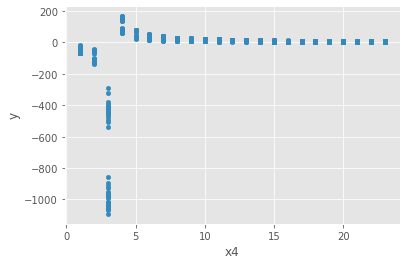

In [16]:
data.plot.scatter(x='x4', y='y')

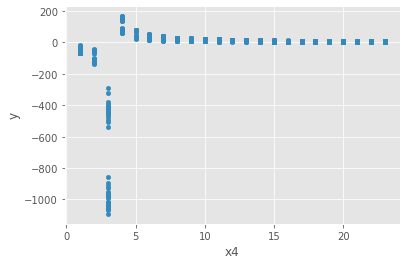

In [17]:
data.plot(x ='x4', y='y', kind = 'scatter')

In [18]:
data.dtypes

x1    int64
x2    int64
x3    int64
x4    int64
y     int64
dtype: object

In [19]:
data.shape

(1000, 5)

In [20]:
data.isnull().sum()

x1    0
x2    0
x3    0
x4    0
y     0
dtype: int64

In [21]:
data.isnull().mean()

x1    0.0
x2    0.0
x3    0.0
x4    0.0
y     0.0
dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data[['x1', 'x2', 'x3', 'x4']], data[['y']], test_size=0.2, random_state=0)


In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 82.67810310193748
Mean Squared Error: 35234.48889728332
Root Mean Squared Error: 187.70852110994673


In [26]:
y_pred[:5]

array([[-79.49372645],
       [-12.70712707],
       [ 51.26473807],
       [-10.09303864],
       [  3.39161708]])

In [27]:
y_test[:5]

,y
993,29
859,13
298,7
553,13
672,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a76fc0550>]],
      dtype=object)

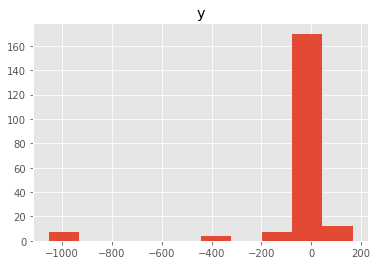

In [28]:
y_test.hist()

In [29]:
y_res = pd.DataFrame(y_pred)

In [30]:
y_res.head()

,0
0,-79.493726
1,-12.707127
2,51.264738
3,-10.093039
4,3.391617


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a76746130>]],
      dtype=object)

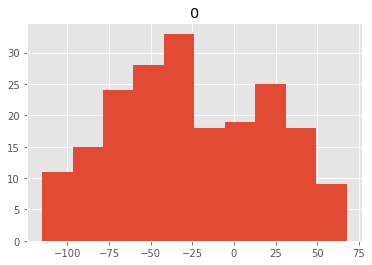

In [31]:
y_res.hist()

In [46]:
test = pd.concat([X_test, y_test], axis=1, join='inner')
pred = pd.concat([X_test, y_res], axis=1, join='inner')

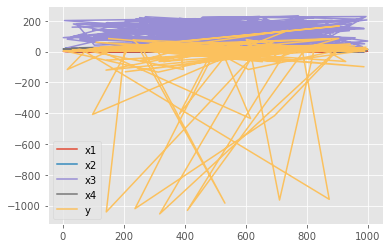

In [47]:
test.plot()

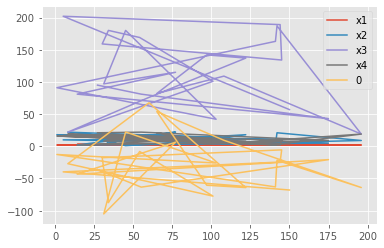

In [48]:
pred.plot()

In [57]:
y_res.head()

,0
0,-79.493726
1,-12.707127
2,51.264738
3,-10.093039
4,3.391617
